# Q-Learning (Crawling Robot)

#### References
* https://www.youtube.com/watch?v=F-kNXAFeffs
* https://www.youtube.com/watch?v=bVbT9zkPIvs
* https://github.com/Rosebotics/ev3dev-curriculum

In [1]:
from agent import Q_Agent
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from crawler_env import CrawlingRobotEnv

initial_e_greedy_prob = 1.0
all_rewards = 0
total_reward = 0
num_iterations_train = 400
eval_iterations = num_iterations_train / 10
# Bigger values decay faster
e_greedy_decay = 1. / num_iterations_train

# Lego-Robot States and Action spaces
n_arms_state, n_hand_state = (3,3)

#### Create Environment

In [2]:
env = CrawlingRobotEnv(render=True, n_arms_state=n_arms_state, n_hand_state=n_hand_state, invert_reward=False)
current_state = env.reset()

### Action and State space before training

In [3]:
# Get the action space
print('Robot action space:', env.action_space.n)
print('Robot state-space:', np.prod([state.n for state in env.observation_space]))
print('Reset State:', current_state)

Robot action space: 6
Robot state-space: 9
Reset State: 4


#### Create Agent

In [4]:
agent = Q_Agent(env, gamma=0.9, alpha=0.9, e_greedy_prob=initial_e_greedy_prob, e_greedy_decay=e_greedy_decay)

##### Agent Internal Action-Space table

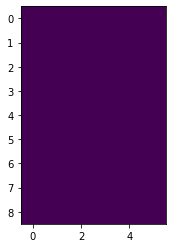

In [5]:
plt.imshow(agent.q_val_table)
plt.show()

#### Training

In [6]:
# Training
i = 0
while i < num_iterations_train:
    i = i + 1
    action = agent.choose_action(current_state)
    next_state, reward, done, info = env.step(action)
    agent.update_q_table(current_state, action, reward, next_state)
    current_state = next_state
    total_reward += reward

    # Evaluate
    if i % eval_iterations == 0:
        print("average_reward in last 1 steps", total_reward / i)
        # Stop training if total reward is big enough
        if (total_reward / i) > 1.8:
            break
        average_reward = 0
        env.render = False

average_reward in last 1 steps 0.0
average_reward in last 1 steps 0.6248444488869594
average_reward in last 1 steps 0.41656296592463965
average_reward in last 1 steps 0.8478873081034394
average_reward in last 1 steps 1.106681913410719
average_reward in last 1 steps 1.487493133244559
average_reward in last 1 steps 1.6492646294241662
average_reward in last 1 steps 2.2090976354855987


#### Action-Space after training

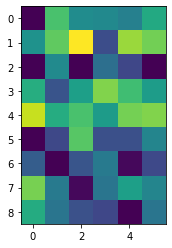

In [7]:
plt.imshow(agent.q_val_table)
plt.show()

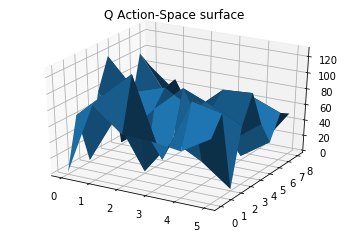

In [8]:
# Convert 2D list to numpy array
q_val_table = np.array(agent.q_val_table)
nx, ny = q_val_table.shape[1], q_val_table.shape[0]
x = range(nx)
y = range(ny)
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ha.plot_surface(X, Y, q_val_table)
plt.title('Q Action-Space surface')
plt.show()

#### Evaluate

In [9]:
# Evaluating
current_state=env.reset()
total_reward = 0
# Force epsilon-greedy to always use the max Q (become greedy)
agent.e_greedy_prob = 0

for i in range(100):
    action = agent.choose_action(current_state)
    next_state, reward, done, info = env.step(action)
    print('Doing Action:', action, 'reward:', reward, 'next_state:', next_state)
    current_state = next_state
    total_reward += reward

Doing Action: 0 reward: 4.820632438159009 next_state: 1
Doing Action: 2 reward: 47.33399807388014 next_state: 0
Doing Action: 1 reward: -2.167074601082277 next_state: 3
Doing Action: 3 reward: 0.0 next_state: 4
Doing Action: 0 reward: 4.820632438159009 next_state: 1
Doing Action: 2 reward: 47.33399807388014 next_state: 0
Doing Action: 1 reward: -2.167074601082277 next_state: 3
Doing Action: 3 reward: 0.0 next_state: 4
Doing Action: 0 reward: 4.820632438159009 next_state: 1
Doing Action: 2 reward: 47.33399807388014 next_state: 0
Doing Action: 1 reward: -2.167074601082277 next_state: 3
Doing Action: 3 reward: 0.0 next_state: 4
Doing Action: 0 reward: 4.820632438159009 next_state: 1
Doing Action: 2 reward: 47.33399807388014 next_state: 0
Doing Action: 1 reward: -2.167074601082277 next_state: 3
Doing Action: 3 reward: 0.0 next_state: 4
Doing Action: 0 reward: 4.820632438159009 next_state: 1
Doing Action: 2 reward: 47.33399807388014 next_state: 0
Doing Action: 1 reward: -2.167074601082277 n